In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [2]:
#loading the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#loading the data
data = pd.read_csv('../input/students-drop-out-prediction/train.csv')
data.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40,label
0,0,3,6,11,55,1,1,16,5,60,...,-0.3,0.79,1,93,47,1,48,26,0,1
1,1,8,94,12,65,1,4,22,4,173,...,5.4,6.51,6,29,37,25,53,35,7,2
2,2,3,166,10,155,1,1,16,1,309,...,0.6,2.02,1,8,34,4,43,38,2,1
3,3,3,6,13,121,1,1,16,1,6,...,0.6,2.02,7,37,40,27,43,65,0,1
4,4,4,51,18,21,1,17,22,118,168,...,8.4,12.51,16,22,25,25,24,23,1,1


In [4]:
#splitting the features and label
X = data.drop('label',axis = 1)
y = data.label

X.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,3,6,11,55,1,1,16,5,60,...,13.9,-0.3,0.79,1,93,47,1,48,26,0
1,1,8,94,12,65,1,4,22,4,173,...,14.9,5.4,6.51,6,29,37,25,53,35,7
2,2,3,166,10,155,1,1,16,1,309,...,11.1,0.6,2.02,1,8,34,4,43,38,2
3,3,3,6,13,121,1,1,16,1,6,...,11.1,0.6,2.02,7,37,40,27,43,65,0
4,4,4,51,18,21,1,17,22,118,168,...,10.9,8.4,12.51,16,22,25,25,24,23,1


In [5]:
y.head()

0    1
1    2
2    1
3    1
4    1
Name: label, dtype: int64

**PREPROCESSING**

In [6]:
#dropping the id column from feature dataframe
X = X.drop('id',axis = 1)
X.head()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,3,6,11,55,1,1,16,5,60,30,...,13.9,-0.3,0.79,1,93,47,1,48,26,0
1,8,94,12,65,1,4,22,4,173,199,...,14.9,5.4,6.51,6,29,37,25,53,35,7
2,3,166,10,155,1,1,16,1,309,30,...,11.1,0.6,2.02,1,8,34,4,43,38,2
3,3,6,13,121,1,1,16,1,6,23,...,11.1,0.6,2.02,7,37,40,27,43,65,0
4,4,51,18,21,1,17,22,118,168,106,...,10.9,8.4,12.51,16,22,25,25,24,23,1


In [7]:
#splitting the data into train and test data
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.20,random_state = 21)
Xtrain.shape,Xtest.shape

((3036, 41), (760, 41))

<AxesSubplot:ylabel='Density'>

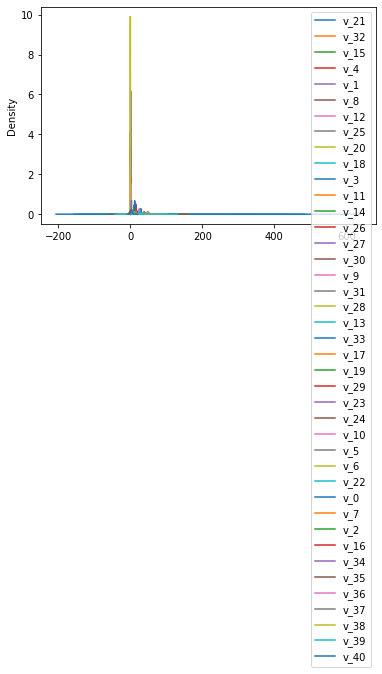

In [8]:
Xtrain.plot.kde()

<AxesSubplot:ylabel='Density'>

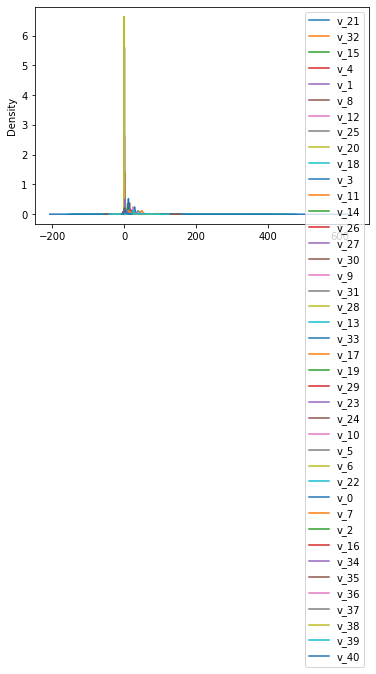

In [9]:
Xtest.plot.kde()

**Since some of the features have very high values as compared to the rest of the features, therefore we need to scale the dataset for the model in order to attain good accuracy**

In [10]:
#importing standardscaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [11]:
Xtrain_ss = ss.fit_transform(Xtrain)
Xtest_ss = ss.transform(Xtest)

<AxesSubplot:ylabel='Density'>

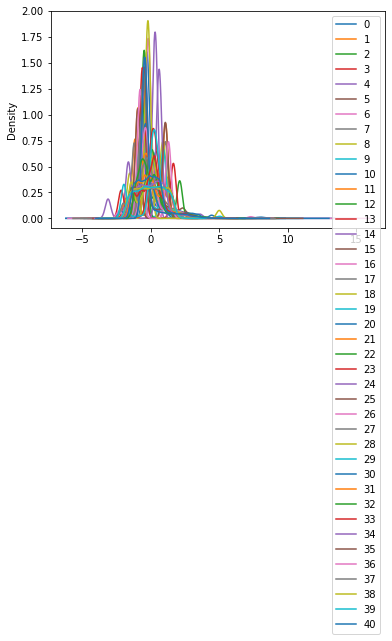

In [12]:
pd.DataFrame(Xtrain_ss).plot.kde()

<AxesSubplot:ylabel='Density'>

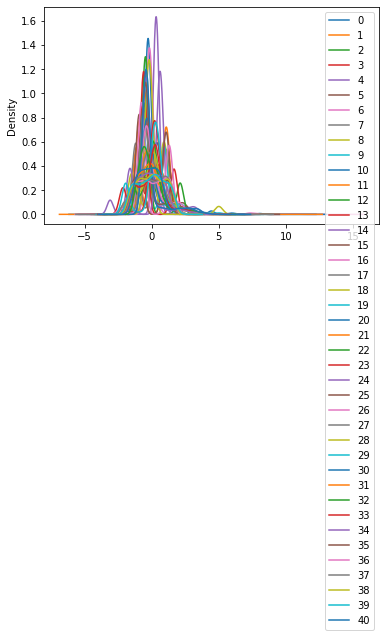

In [13]:
pd.DataFrame(Xtest_ss).plot.kde()

**MODEL FITTING**

**Using GradientBoost Algorithm**

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [15]:
#fitting the model and checking score on train and test data 
gbc.fit(Xtrain_ss,ytrain)
print('Training Score:',gbc.score(Xtrain_ss,ytrain))
print('Testing Score:',gbc.score(Xtest_ss,ytest))

Training Score: 0.8438735177865613
Testing Score: 0.7092105263157895


In [16]:
ypred_tr = gbc.predict(Xtest_ss)

**Visualising the predictions with the help of Precision,Recall,Accuracy and Confusion Matrix**

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       252
           1       0.74      0.88      0.81       375
           2       0.40      0.30      0.34       133

    accuracy                           0.71       760
   macro avg       0.64      0.62      0.62       760
weighted avg       0.70      0.71      0.70       760



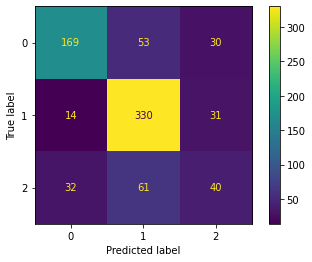

In [18]:
print(classification_report(ytest,ypred_tr))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred_tr))

**USING HYPERPARAMETERS**

In [19]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate':[0.1,0.2],
         'n_estimators':[100,200],
         'criterion':['friedman_mse', 'squared_error'],
         'max_depth':[4,5],
         'max_features':['sqrt','log2'],
         'warm_start':[True,False]}

In [20]:
gc = GridSearchCV(gbc,params,cv = 4)
gc.fit(Xtrain_ss,ytrain)
gc.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'warm_start': False}

In [21]:
gc.score(Xtrain_ss,ytrain)

0.9440052700922266

In [22]:
gc.score(Xtest_ss,ytest)

0.7263157894736842

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       252
           1       0.75      0.89      0.82       375
           2       0.45      0.32      0.37       133

    accuracy                           0.73       760
   macro avg       0.66      0.63      0.64       760
weighted avg       0.71      0.73      0.71       760



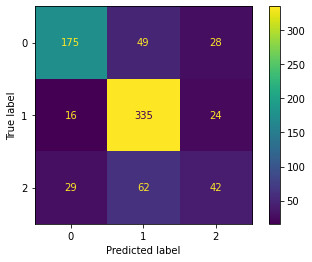

In [23]:
ypred_tr = gc.predict(Xtest_ss)
print(classification_report(ytest,ypred_tr))
print(ConfusionMatrixDisplay.from_predictions(ytest,ypred_tr))

**LOADING THE TEST DATA**

In [24]:
test = pd.read_csv('../input/students-drop-out-prediction/test.csv')
test.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,0,9,90,15,121,1,8,23,114,256,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,1,7,123,14,126,1,5,19,3,40,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,2,3,6,10,102,1,1,16,181,168,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,3,6,10,148,1,1,16,110,278,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,4,3,6,10,148,1,1,16,1,168,...,7.6,2.6,0.32,7,97,25,30,18,52,0


In [25]:
#removing the id column from test data
test_id = test.drop('id',axis = 1)
test_id.head()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
0,9,90,15,121,1,8,23,114,256,108,...,10.8,10.4,6.74,4,96,36,34,23,72,5
1,7,123,14,126,1,5,19,3,40,261,...,19.4,0.5,6.79,15,78,12,25,27,67,12
2,3,6,10,102,1,1,16,181,168,103,...,7.6,2.6,0.32,4,81,47,30,54,23,4
3,3,6,10,148,1,1,16,110,278,103,...,11.1,0.6,2.02,4,100,6,23,12,28,1
4,3,6,10,148,1,1,16,1,168,12,...,7.6,2.6,0.32,7,97,25,30,18,52,0


In [26]:
#scaling the test data
test_id = ss.transform(test_id)

In [27]:
#predictions on test data
ypred_test = gc.predict(test_id)

In [28]:
#storing the prediction and id in a dataframe
file = pd.DataFrame(data = test.id,columns = ['id'])
file['label'] = ypred_test

In [29]:
file.head()

,id,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [30]:
file.label.value_counts()

1    924
0    511
2    193
Name: label, dtype: int64

In [31]:
#converting to csv format
file.to_csv('submission.csv',index = False)